<a href="https://colab.research.google.com/github/rjhalliday/keras-examples/blob/main/keras_ltms_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple LTSM example

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 1. Generate Synthetic Data
np.random.seed(0)
data_length = 1000
time_series_data = np.sin(np.linspace(0, 100, data_length)) + np.random.normal(0, 0.1, data_length)

# Convert to pandas DataFrame for convenience
df = pd.DataFrame(time_series_data, columns=['value'])

# 2. Prepare the Data
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Define time step
time_step = 10

# Create dataset
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 3. Build the Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# 4. Train the Model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# 5. Evaluate the Model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 43ms/step - loss: 0.1746 - val_loss: 0.0293
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0306 - val_loss: 0.0300
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0237 - val_loss: 0.0288
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0228 - val_loss: 0.0246
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0190 - val_loss: 0.0206
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0155 - val_loss: 0.0146
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0123 - val_loss: 0.0086
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0067 - val_loss: 0.0037
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0041 - val_loss: 0.0030
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026 
Test Loss: 0.002530575729906559


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


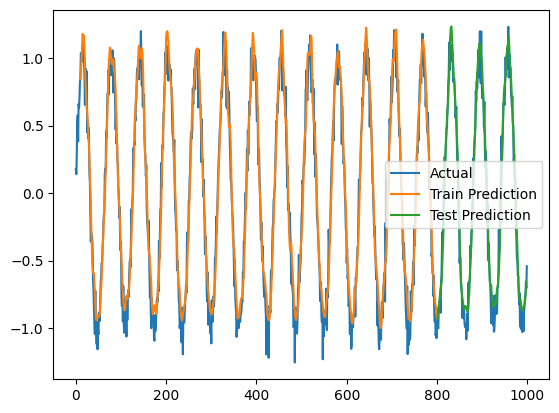

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# 6. Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot the predictions
plt.plot(df['value'], label='Actual')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Train Prediction')
plt.plot(np.arange(len(train_predict) + time_step, len(df)-1), test_predict, label='Test Prediction')
plt.legend()
plt.show()
